<a href="https://colab.research.google.com/github/natalia-kurbakova/Exploring-SKLearn-LazyPredict-and-TensorFlow/blob/main/Exploring_Machine_Learning_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the workshop! 
Explore Machine Learning libraries with Baruch AIS!

# Scikit-Learn
Documentation: https://scikit-learn.org/stable/index.html 

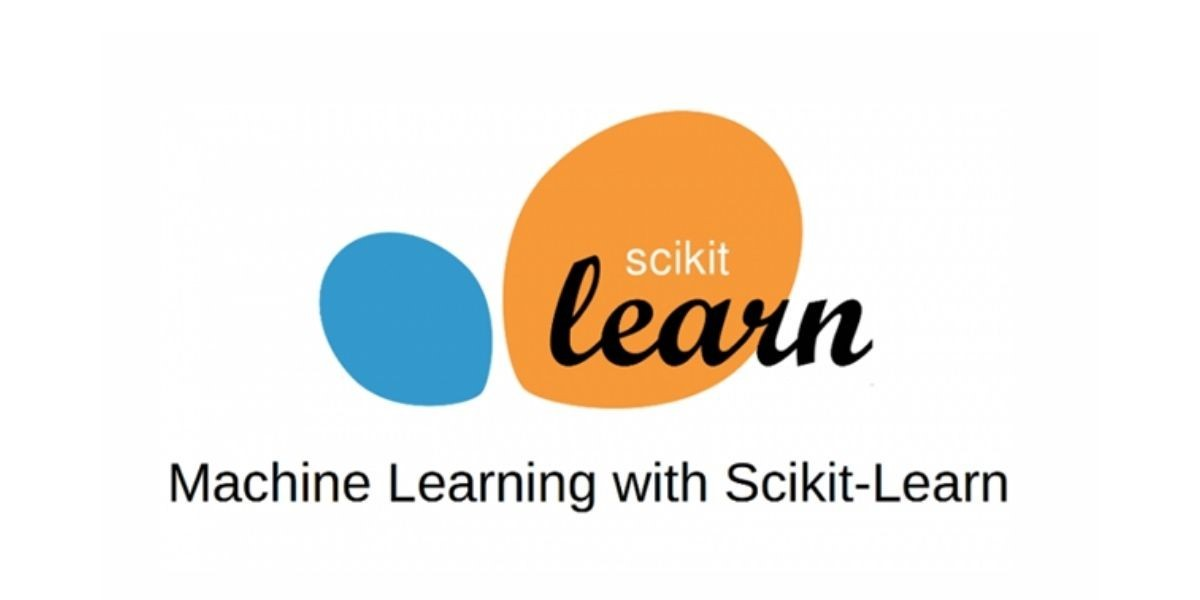

# Classification with k-nearest neighbors

In [ ]:
# pre-loading datasets using scikit-learn API
from sklearn import datasets

In [ ]:
wine = datasets.load_wine()
# Wine recognition dataset description
print(wine.DESCR)

In [ ]:
# printing three observations
wine.data[35:68:13]

In [ ]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [ ]:
# Import KNeighborsClassifier and train_test_split modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = wine.data
y = wine.target

# Split into training and test set
# we want our test set to be representative of this distribution of samples per class: [59,71,48] -> stratify argument
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
# as k increases, the decision boundary becomes smoother, and the model becomes simpler and less sensitive to noise
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.7407407407407407


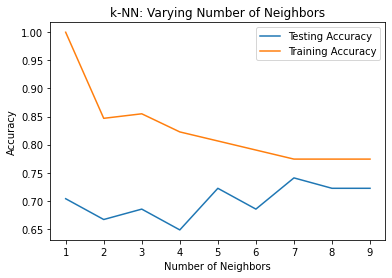

In [ ]:
# how can we figure out what the n_neighbors argument shouls be?
# we could iterate over the first 10 values it can take, afterwards the model is likely to become too simple

import numpy as np
import matplotlib.pyplot as plt

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
'''
Other performance measures besides Accuracy:

Confusion matrix
Precision
Recall (aka Sensitivity)
F1-score (aka F-score)
Specificity

Determine evaluation metrics based on the business problem.
'''

In [ ]:
# Let's say, we're going to the supermarket to find a nice bottle of wine. We are left with two final options. Now let's predict the classes of both wines given their attributes

# Predict and print the label for the new data points X_new
X_new = [[1.425e+01, 1.712e+00, 2.420e+00, 1.570e+01, 1.265e+02, 2.801e+00,
          3.061e+00, 2.800e-01, 2.291e+00, 5.648e+00, 1.040e+00, 3.9190e+00,
          1.063e+03],
         [1.208e+01, 2.080e+00, 1.700e+00, 1.750e+01, 9.690e+01, 2.231e+00,
          2.179e+00, 2.620e-01, 1.401e+00, 3.310e+00, 1.269e+00, 2.961e+00,
          7.102e+02]]

new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: [0 2]


# Regression

Predicting the value of target y from feature x:  
**y = a * x + b**

How do we choose a and b?

In [ ]:
#load dataset
cali_housing = datasets.fetch_california_housing()

In [ ]:
print(cali_housing.DESCR)

In [ ]:
print(cali_housing.feature_names, cali_housing.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] ['MedHouseVal']


In [ ]:
medIncome = cali_housing.data[:,0].reshape(-1,1)
medIncome.shape

In [ ]:
medHouseValue = cali_housing.target.reshape(-1,1)
medHouseValue.shape

In [ ]:
# Import LinearRegression and other necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(medIncome, medHouseValue, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)


# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))

cvscores = cross_val_score(reg_all, X_train, y_train, cv=5)
print("R^2 with cross validation: {}".format(np.mean(cvscores)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.47293192589970245
R^2 with cross validation: 0.473323828867161
Root Mean Squared Error: 0.8317439430526982


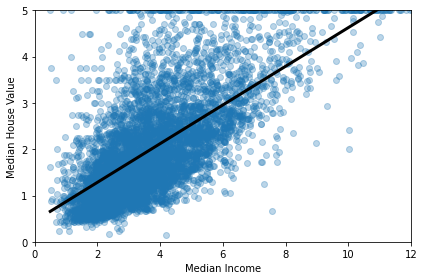

In [ ]:
# Let's visualize!

import matplotlib.pyplot as plt

# Create the prediction space
prediction_space = np.linspace(min(X_test), max(X_test)).reshape(-1,1)
predicted_values = reg_all.predict(prediction_space)
# Plot regression line
plt.rcParams["figure.autolayout"] = True
plt.scatter(X_test, y_test, alpha=0.3)
plt.plot(prediction_space, predicted_values, color='black', linewidth=3)
plt.xlim(0, 12)
plt.ylim(0, 5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

In [ ]:
# When there are multiple independent variables, large coefficients can lead to overfitting. We need regularization to avoid that:
# Lasso - assigns coefficients to features. Insignificant features will be assigned coefficients of 0
# Ridge - performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha.

# Decision Trees

In [ ]:
# Classification dataset

from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, criterion="gini", random_state=42)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
accuracy_gini = accuracy_score(y_test, y_pred)
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')



# Let's change the entropy information criterion

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt_entropy = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=42)

# Fit dt to the training set
dt_entropy.fit(X_train, y_train)

# Predict test set labels
y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred)
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

Accuracy achieved by using the gini index: 0.780
Accuracy achieved by using entropy: 0.785


In [ ]:
# Regression dataset

from sklearn import datasets

cali_housing = datasets.fetch_california_housing()
districtFeatures = cali_housing.data
medHouseValue = cali_housing.target.reshape(-1,1)

# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(districtFeatures, medHouseValue, test_size = 0.3, random_state=42)

In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=5,
             min_samples_leaf=0.13,
             random_state=42)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.86


# Lazy Predict

GitHub: https://github.com/shankarpandala/lazypredict/

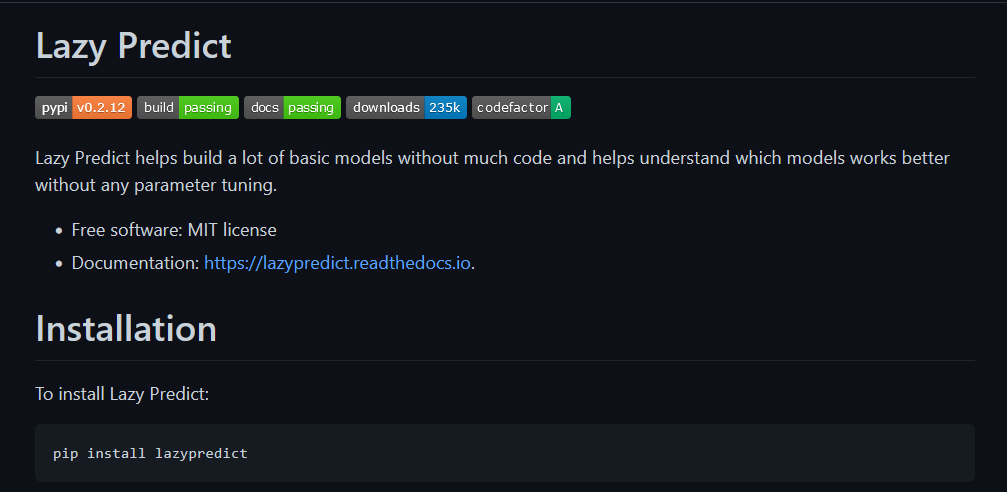

This library got a lot of attention when it was published. Lazy Predict helps build a lot of basic models without much code or any parameter tuning and evaluate the models for different metrics and execution time. And it can be used with scikit-learn API.

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
# Classification

from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 15.07it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.99,0.99,0.99,0.99,0.02
Perceptron,0.99,0.98,0.98,0.99,0.02
LogisticRegression,0.99,0.98,0.98,0.99,0.04
SVC,0.98,0.98,0.98,0.98,0.03
XGBClassifier,0.98,0.98,0.98,0.98,0.20
LabelPropagation,0.98,0.97,0.97,0.98,0.07
LabelSpreading,0.98,0.97,0.97,0.98,0.03
BaggingClassifier,0.97,0.97,0.97,0.97,0.06
PassiveAggressiveClassifier,0.98,0.97,0.97,0.98,0.02


In [ ]:
# Regression

from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
boston = datasets.load_diabetes()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:10<00:00,  4.14it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.38,0.52,54.22,0.24
OrthogonalMatchingPursuitCV,0.37,0.52,54.39,0.02
Lasso,0.37,0.52,54.46,0.02
LassoLars,0.37,0.52,54.46,0.01
LarsCV,0.37,0.51,54.54,0.07
LassoCV,0.37,0.51,54.59,0.07
PassiveAggressiveRegressor,0.37,0.51,54.74,0.02
LassoLarsIC,0.36,0.51,54.83,0.02
SGDRegressor,0.36,0.51,54.85,0.05


# TensorFlow
Documentation: https://www.tensorflow.org/ 

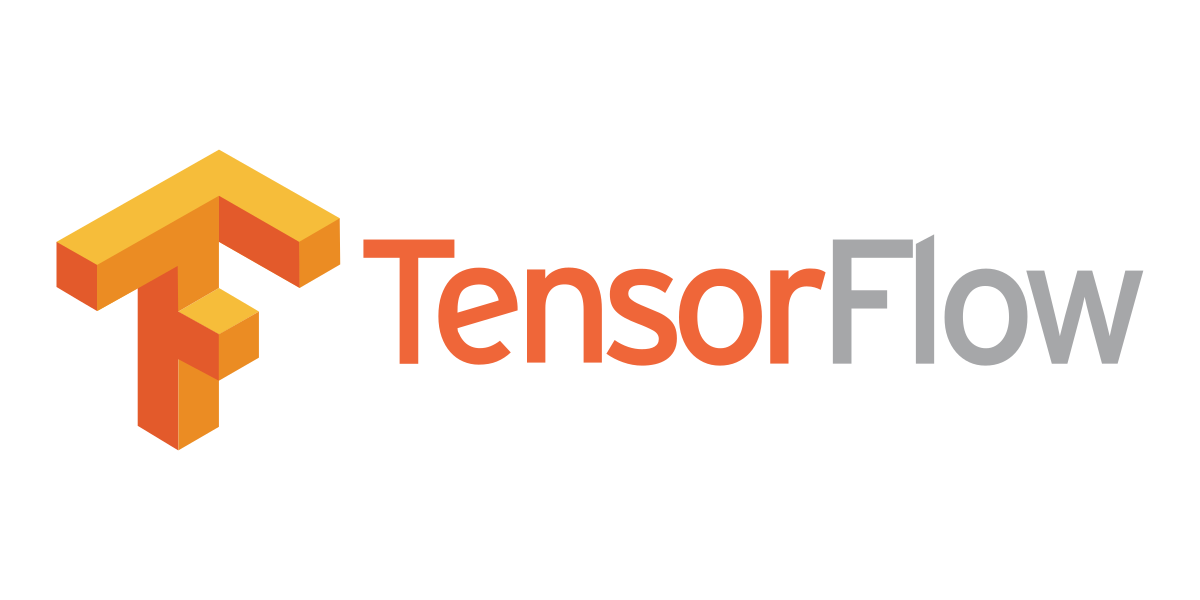

In [ ]:
import tensorflow as tf

Keras is TensorFlow’s high-level deep learning API: it allows you to build, train, evaluate, and execute all sorts of neural networks. Installing TensorFlow will automatically install Keras as well, and Keras will not work without TensorFlow installed.

In [ ]:
# We will use Fashion MNIST that contains images representing fashion items rather than handwritten digits
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
# It’s already shuffled and split into a training set (60,000 images) and a test set (10,000 images), but we’ll hold out the last 5,000 images from the training set for validation
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
# For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats)
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
# this is a classification dataset with the following classes of the target variable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
tf.random.set_seed(42)

# Sequential model is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially
model = tf.keras.Sequential()

# we build the first layer (an Input layer) and add it to the model
model.add(tf.keras.layers.Input(shape=[28, 28]))

# Then we add a Flatten layer. Its role is to convert each input image into a 1D array
model.add(tf.keras.layers.Flatten())

# Next we add two Dense hidden layers with 300 neurons and 100 neurons. They will use the ReLU activation function
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))

# Finally, we add a Dense output layer with 10 neurons (one per class)
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Same code but more compact
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

In [ ]:
model.layers

In [ ]:
# weights are the parameters of a layer
weights, biases = model.layers[1].get_weights()
weights

In [ ]:
weights.shape

In [ ]:
biases

In [ ]:
biases.shape

(300,)

In [ ]:
# After a model is created, you must call its compile() method to specify the loss function and the optimizer to use
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
# Calling the fit method to train the model
history = model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

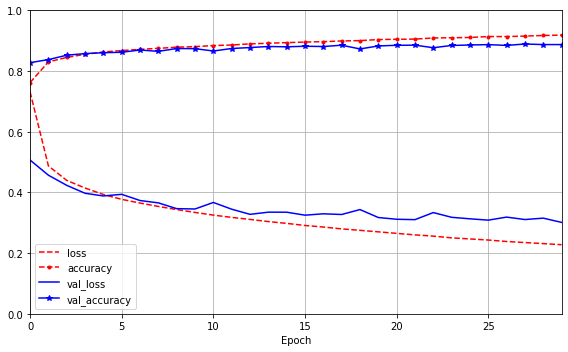

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3206 - accuracy: 0.8865


[0.32058534026145935, 0.8865000009536743]

In [ ]:
model.save("my_keras_model", save_format="tf")

## Transfer Learning:
When we want to build a model that performs similar tasks that another model is already trained to do, we can use transfer learning and reuse the existing model's layers, which is useful if you don't have enough data for the new model,

TensorFlow Playground: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.73485&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# What happens next?

# Your personal projects!

Data science is about using data for insights. When you are working with data, machine learning is a tool that helps you build a model and automate certain tasks. Overall, quite simple to integrate in any data project.

## Here is the McKinsey data science workflow breakdown:
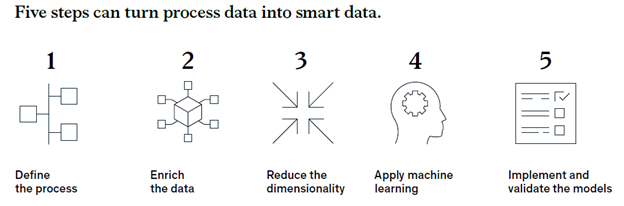

Usually involves:
1. Deciding on performance measures and assumptions given the problem
2. Lots of EDA, cleaning, and data sanity checks
3. Feature extraction
4. Building the actual model
5. Model evaluation, hyperparameter tuning and dimensionality reduction if needed
6. Model validation (wow, model, you're so accurate :3 )

# Resources:

### The data science holy grail is the Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow 3rd edition by Aurélien Géron.

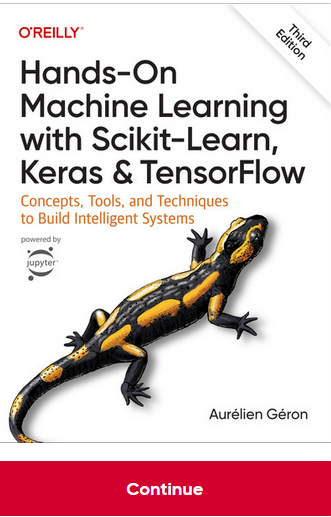

### Practice your data knowledge on DataCamp (unlimited access provided by certain CIS courses in Baruch) and Codecademy!!

### And follow Baruch AIS <3
